In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [49]:
df.shape

(1460, 81)

In [50]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
#Missing Values
null_features = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in null_features :
    print(feature, np.round(df[feature].isnull().mean()*100,4), '% missing value')

LotFrontage 17.7397 % missing value
Alley 93.7671 % missing value
MasVnrType 0.5479 % missing value
MasVnrArea 0.5479 % missing value
BsmtQual 2.5342 % missing value
BsmtCond 2.5342 % missing value
BsmtExposure 2.6027 % missing value
BsmtFinType1 2.5342 % missing value
BsmtFinType2 2.6027 % missing value
FireplaceQu 47.2603 % missing value
GarageType 5.5479 % missing value
GarageYrBlt 5.5479 % missing value
GarageFinish 5.5479 % missing value
GarageQual 5.5479 % missing value
GarageCond 5.5479 % missing value
PoolQC 99.5205 % missing value
Fence 80.7534 % missing value
MiscFeature 96.3014 % missing value


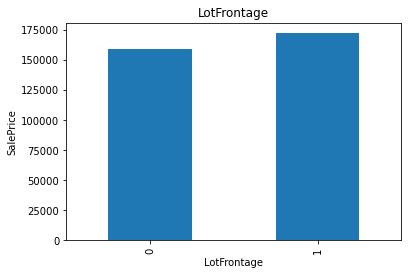

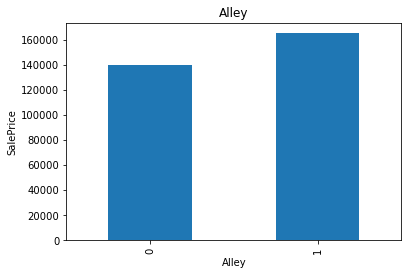

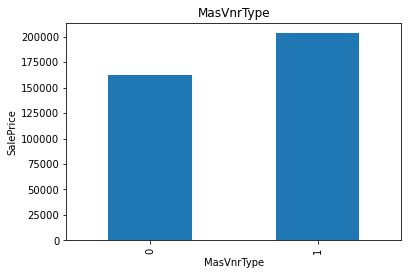

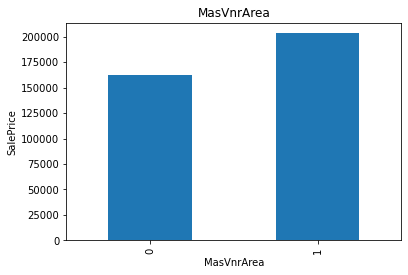

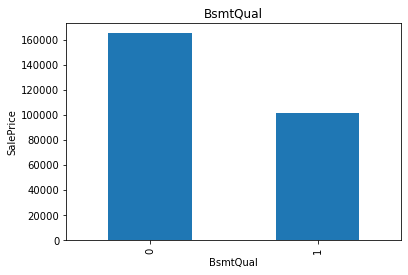

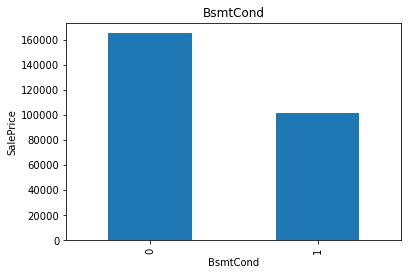

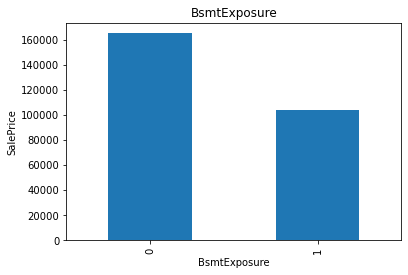

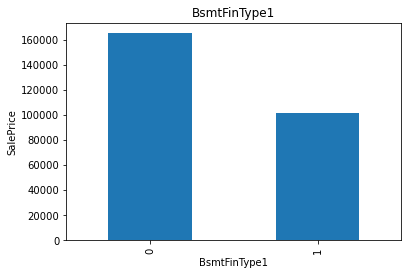

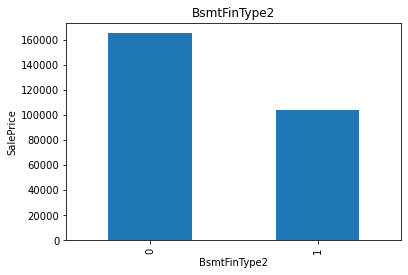

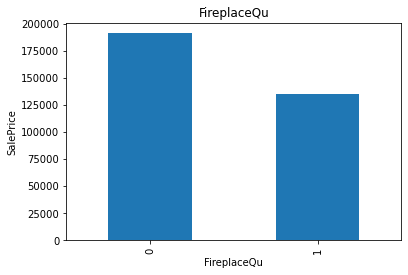

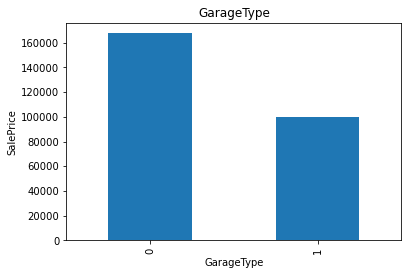

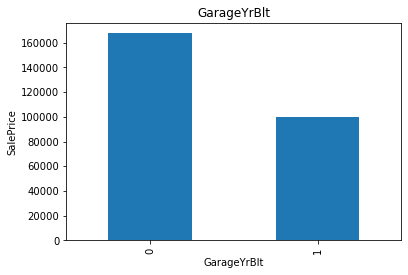

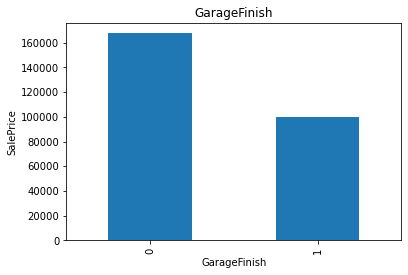

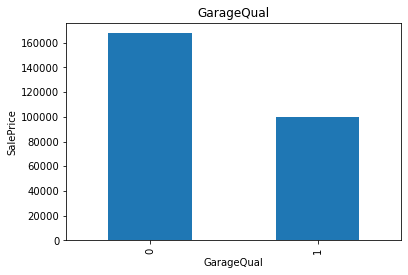

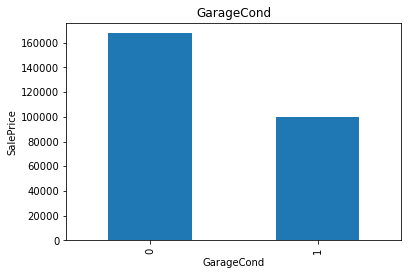

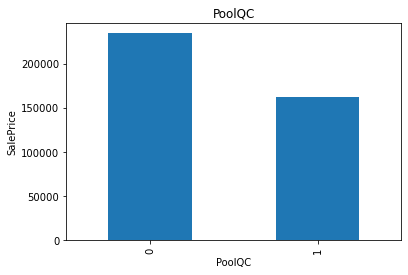

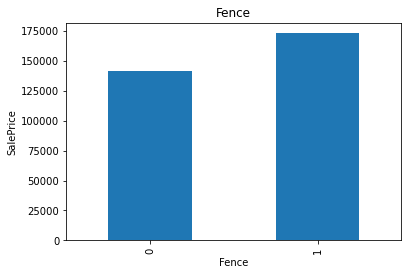

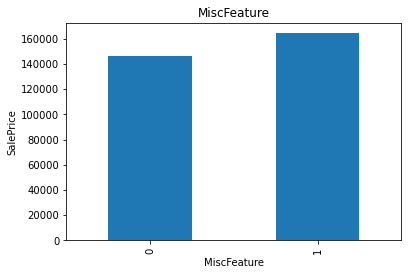

In [52]:
#Find the relationship between features with missing value with dependent variable

for feature in null_features:
    data = df.copy()
    
    #Make variable that indicates 1 if null and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0) 
    
    #Make plot to find the relationship between the features, we use median because there's outliers
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

If the bar is higher in bar 1 (where it's a null value) , it means that the feature have a relationship with the dependent variable

# Numerical Value

In [53]:
#Find the numerical value (where the data type is not object)
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [54]:
#From that numerical value, determine which one is the temporal variables (Datetime)
datetime_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

print(datetime_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [55]:
df[datetime_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


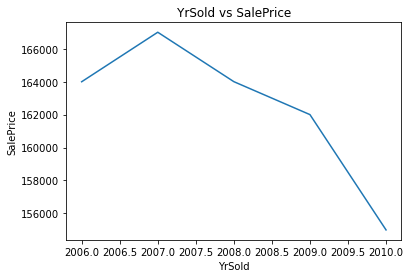

In [56]:
#Make plot to find the relationship between the features and the dependent variable
data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('YrSold vs SalePrice')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

The graph looks strange because the price of the house suppose to be increasing as the year also increasing. We can try to change the value into age

In [57]:
df[datetime_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [58]:
for feature in datetime_features:
    if feature!='YrSold':
        df[feature]=df['YrSold']-df[feature]

In [59]:
df[datetime_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


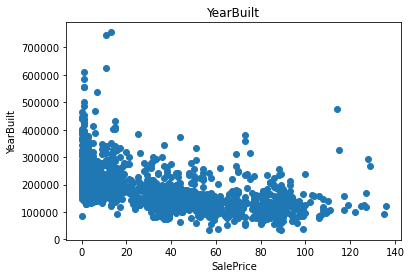

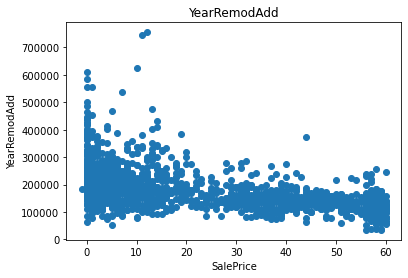

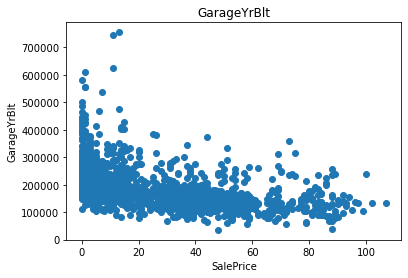

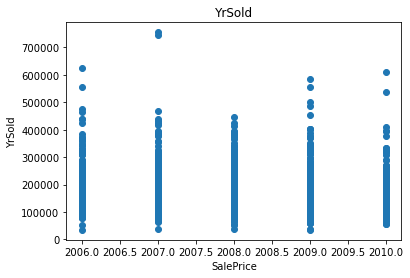

In [60]:
#Make plot to find the relationship between the features and the dependent variable
for feature in datetime_features:
    plt.scatter(df[feature],df['SalePrice'])
    plt.title(feature)
    plt.xlabel('SalePrice')
    plt.ylabel(feature)
    plt.show()

In [61]:
#Numerical variable have 2 types, which is Continuous and Discrete Variable, here we try to seperate the two

#Discrete Variables
disc_features = [feature for feature in numerical_features if feature!='Id' and feature!='SalePrice' and len(df[feature].unique())<25]

print(disc_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


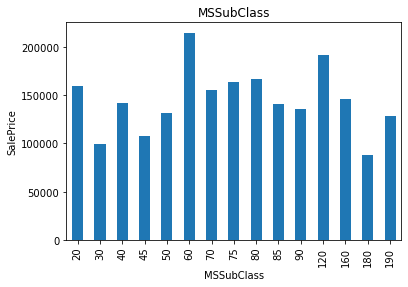

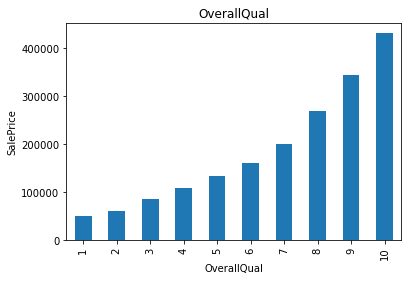

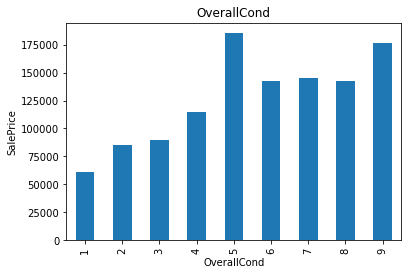

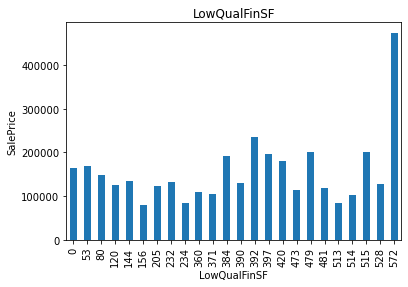

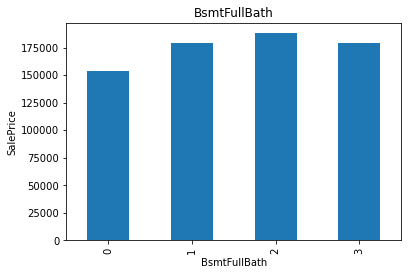

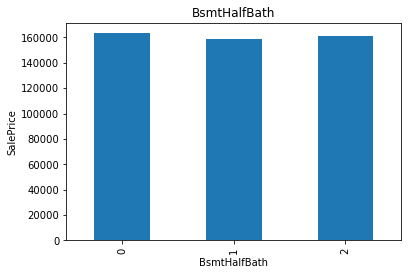

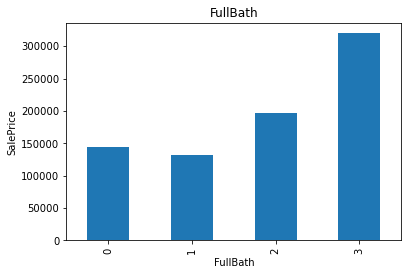

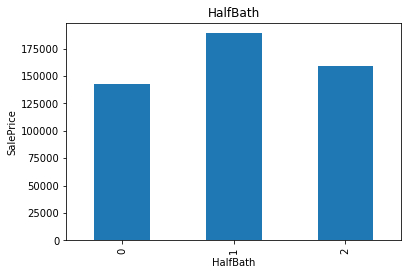

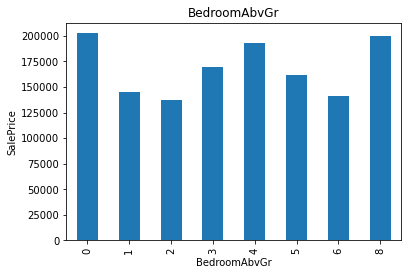

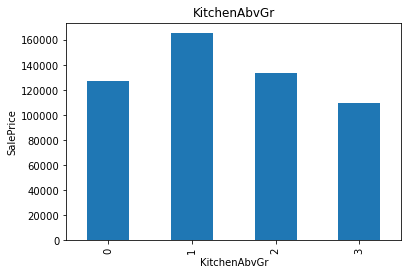

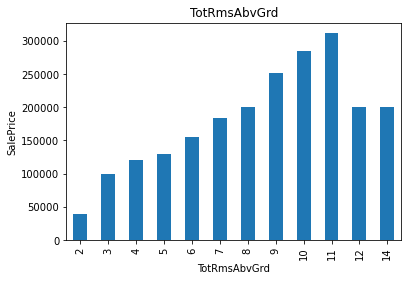

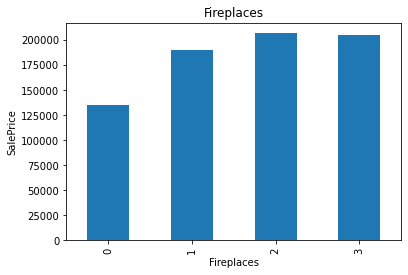

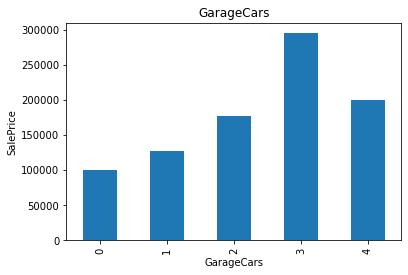

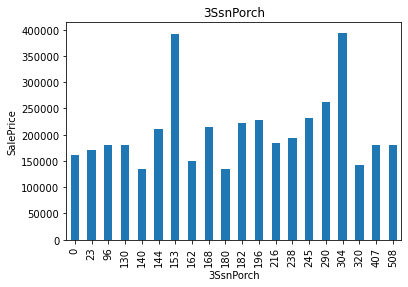

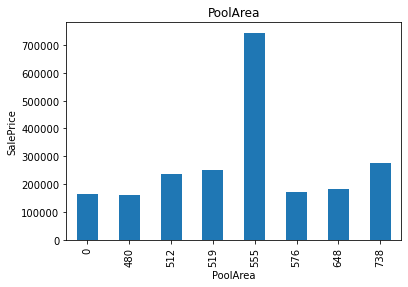

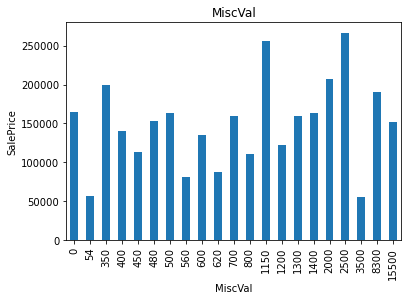

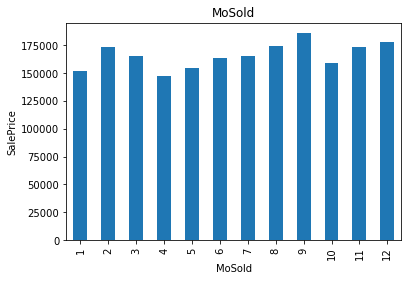

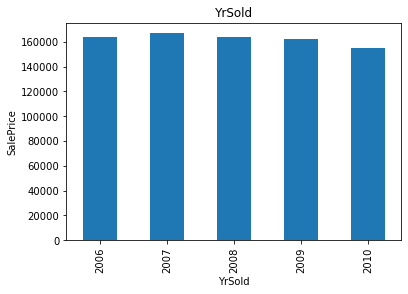

In [62]:
for feature in disc_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

From the graph bar above, we can see a few of the feature have a relation with the dependent variable (where it have a linear relationship) and some are not 

In [63]:
#Continuous Variables
cont_features = [feature for feature in numerical_features if feature not in disc_features and feature!='Id']

print(cont_features)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


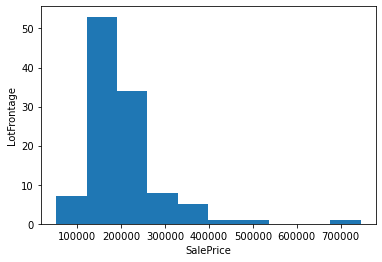

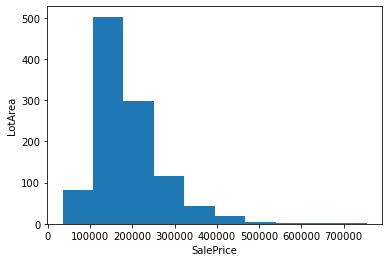

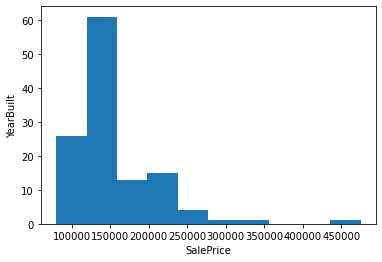

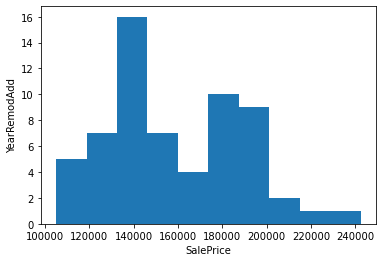

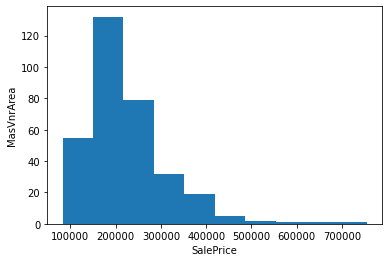

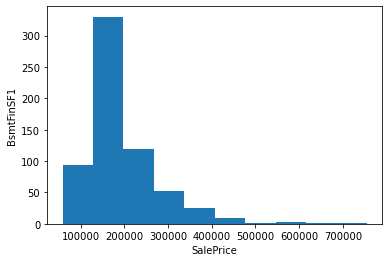

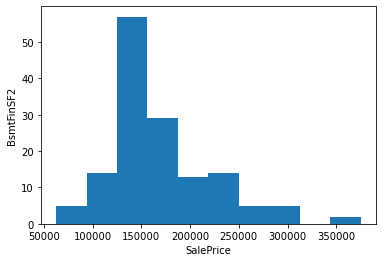

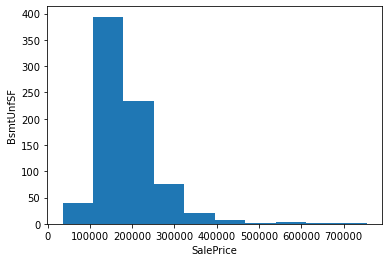

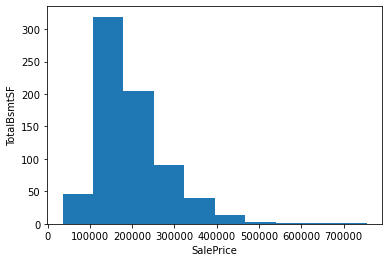

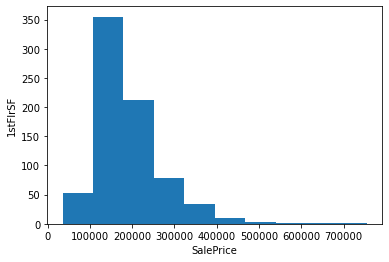

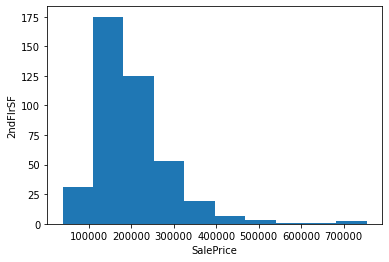

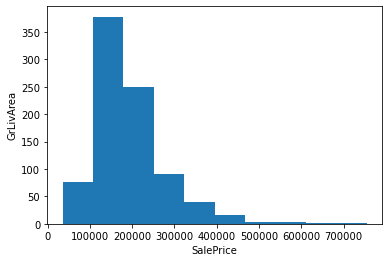

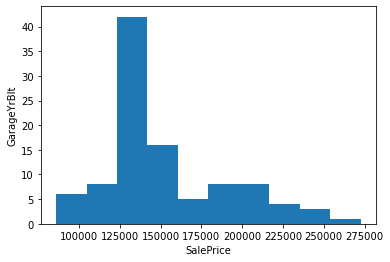

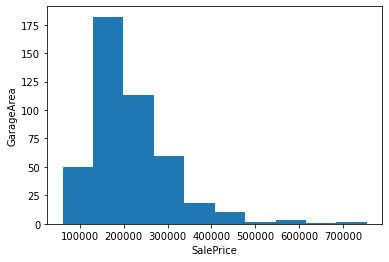

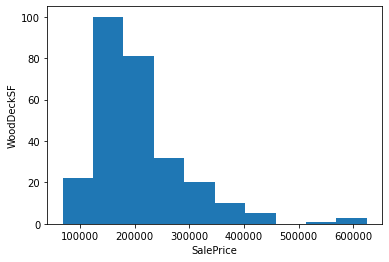

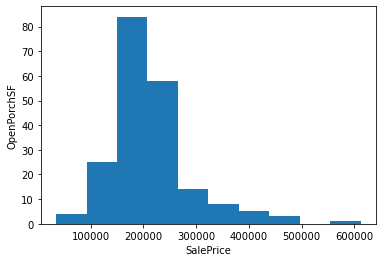

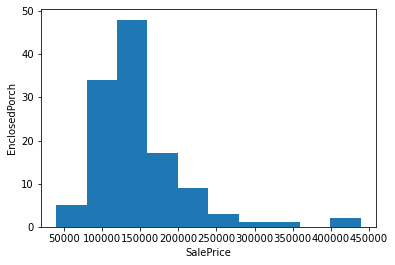

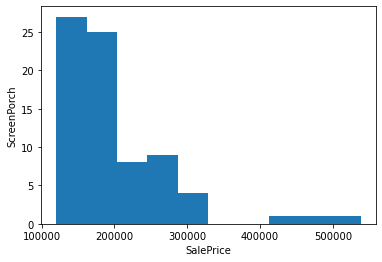

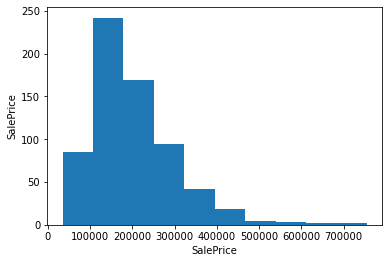

In [64]:
for feature in cont_features:
    df.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel('SalePrice')
    plt.ylabel(feature)
    plt.show()

The graph dosesn't look evenly distributed, we can normalize it using log normal distribution 

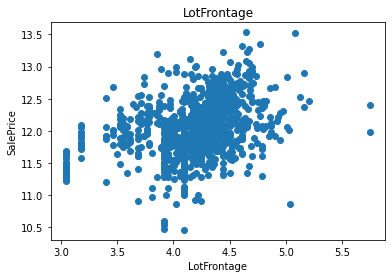

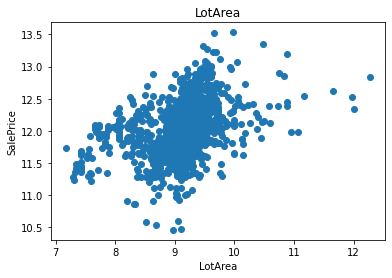

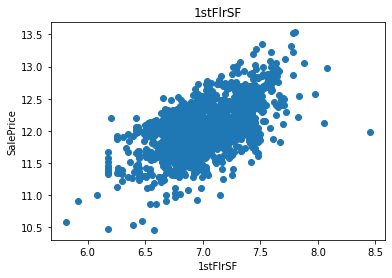

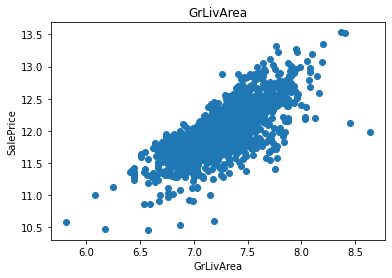

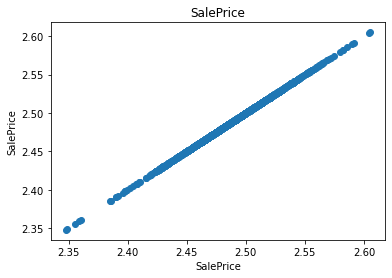

In [65]:
for feature in cont_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

# Outliers

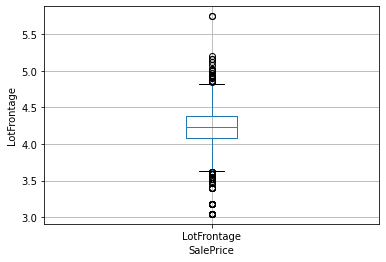

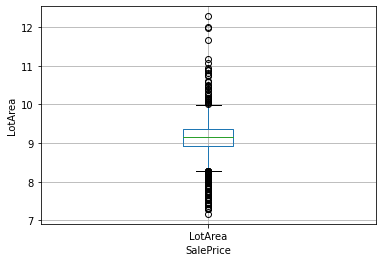

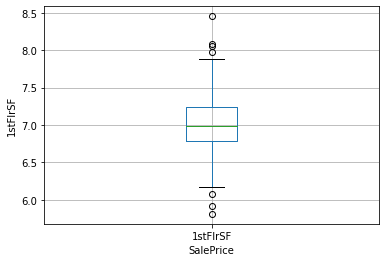

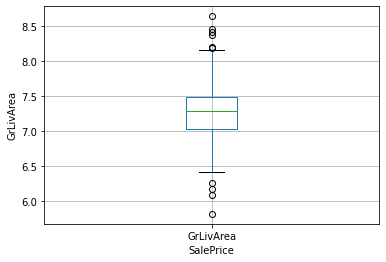

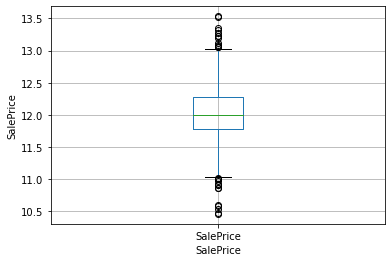

In [66]:
for feature in cont_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel('SalePrice')
        plt.ylabel(feature)
        plt.show()

We can see that the features have a lot of outliers, we will deal with it in the Feature Engineering

# Categorical Variables

In [67]:
#Categorical Variables
#Find the categorical variables (where the data type is object)
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [68]:
#Find out how many different categories in each categorical variables
for feature in categorical_features:
    print(feature, ':' , len(df[feature].unique()), 'categories')

MSZoning : 5 categories
Street : 2 categories
Alley : 3 categories
LotShape : 4 categories
LandContour : 4 categories
Utilities : 2 categories
LotConfig : 5 categories
LandSlope : 3 categories
Neighborhood : 25 categories
Condition1 : 9 categories
Condition2 : 8 categories
BldgType : 5 categories
HouseStyle : 8 categories
RoofStyle : 6 categories
RoofMatl : 8 categories
Exterior1st : 15 categories
Exterior2nd : 16 categories
MasVnrType : 5 categories
ExterQual : 4 categories
ExterCond : 5 categories
Foundation : 6 categories
BsmtQual : 5 categories
BsmtCond : 5 categories
BsmtExposure : 5 categories
BsmtFinType1 : 7 categories
BsmtFinType2 : 7 categories
Heating : 6 categories
HeatingQC : 5 categories
CentralAir : 2 categories
Electrical : 6 categories
KitchenQual : 4 categories
Functional : 7 categories
FireplaceQu : 6 categories
GarageType : 7 categories
GarageFinish : 4 categories
GarageQual : 6 categories
GarageCond : 6 categories
PavedDrive : 3 categories
PoolQC : 4 categories
Fen

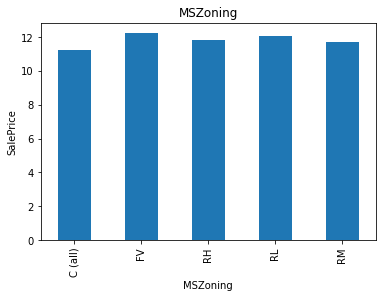

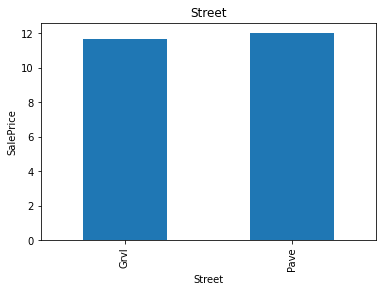

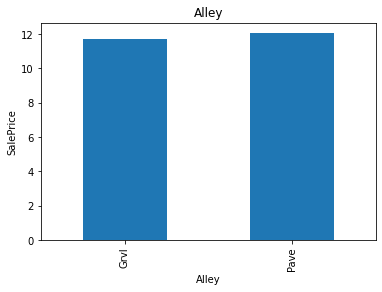

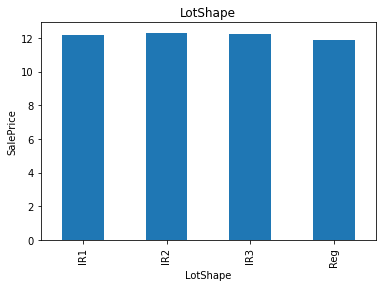

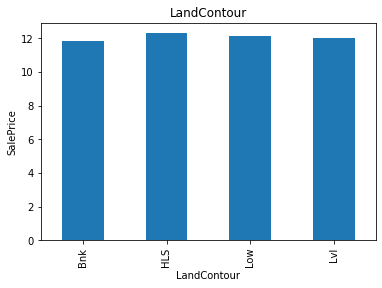

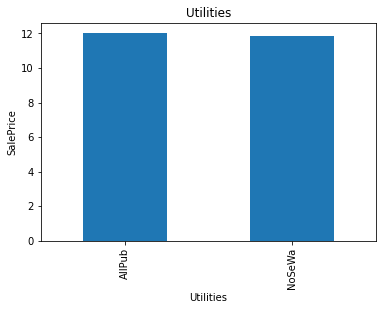

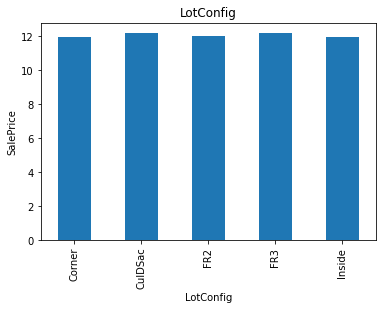

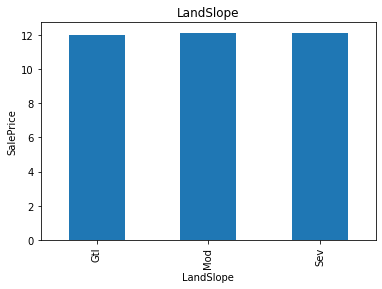

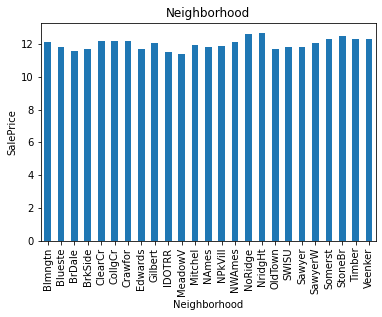

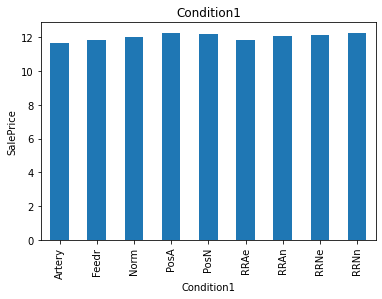

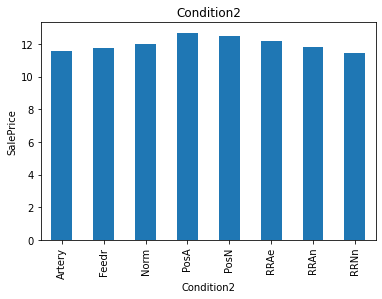

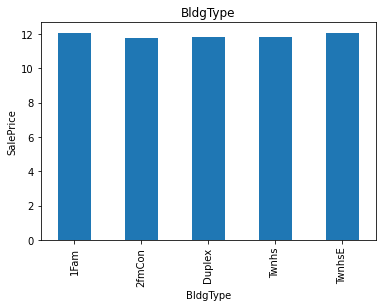

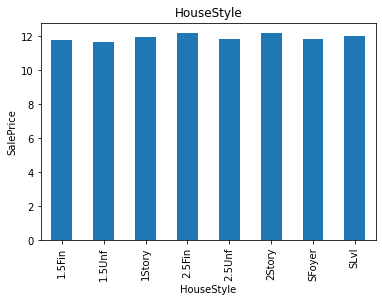

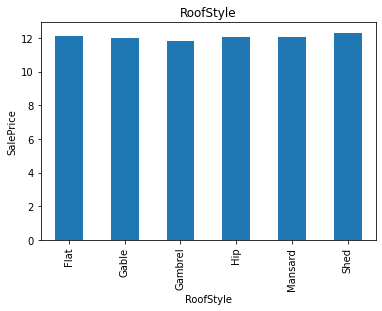

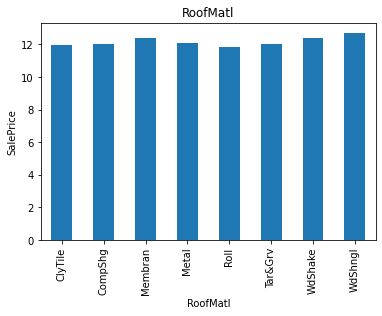

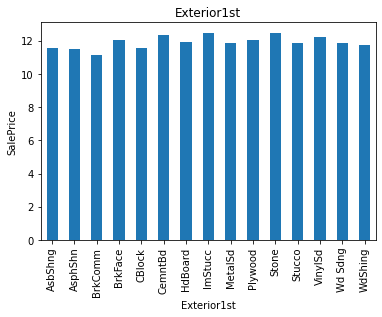

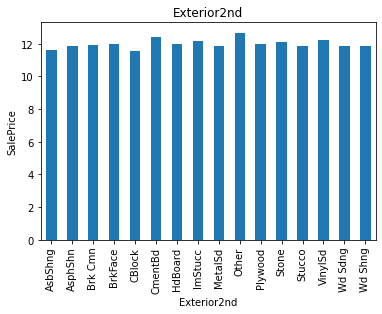

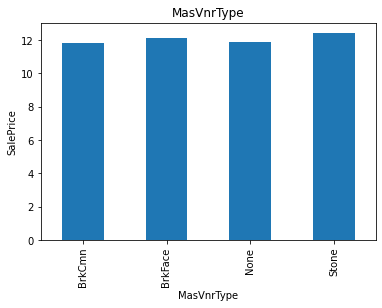

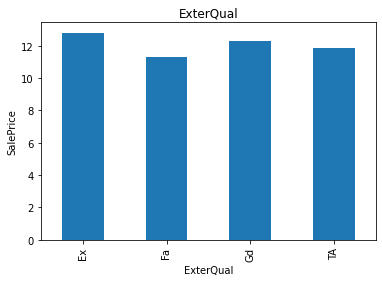

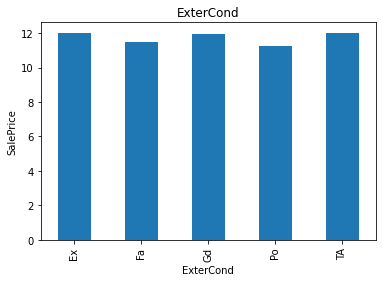

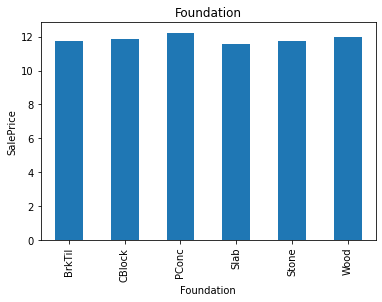

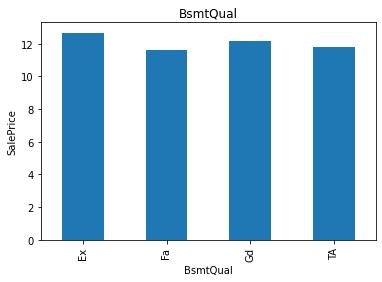

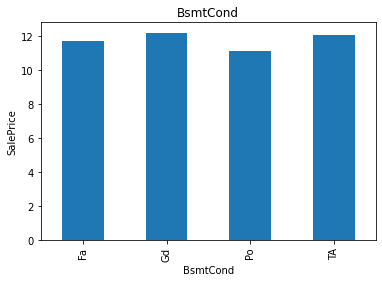

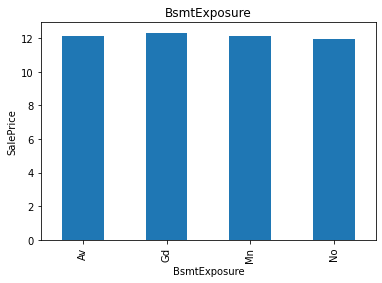

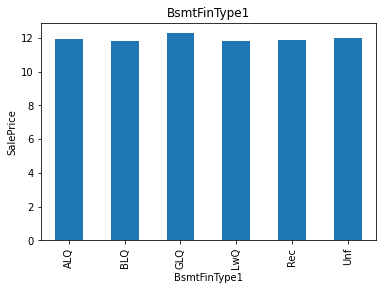

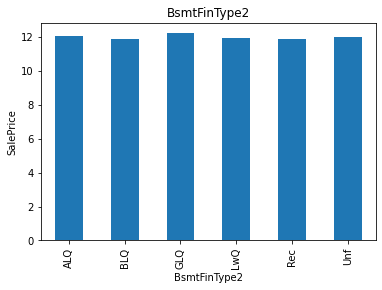

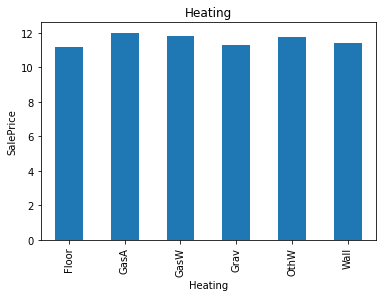

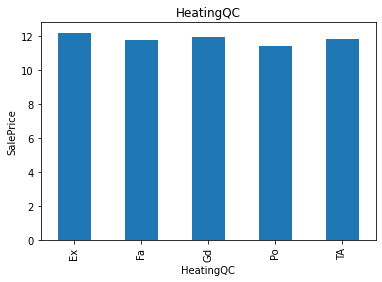

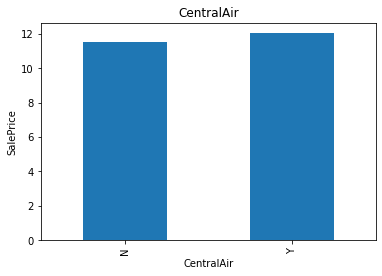

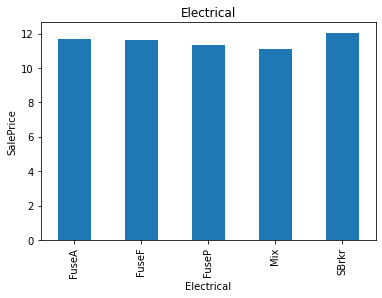

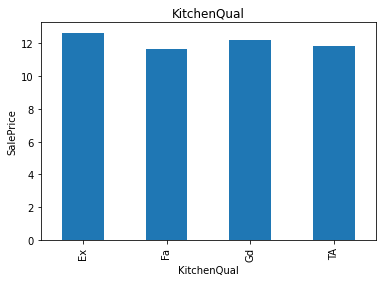

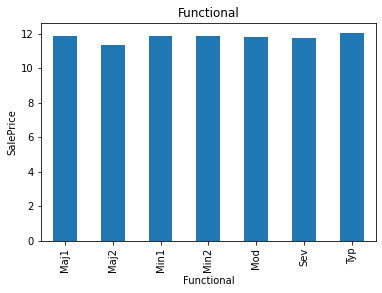

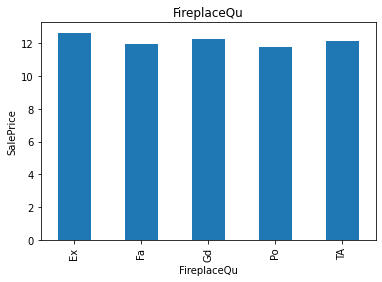

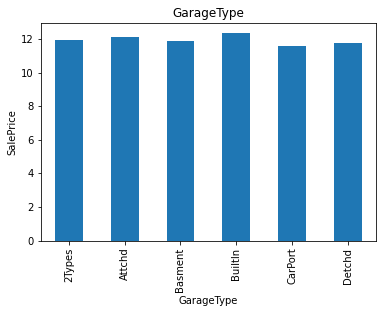

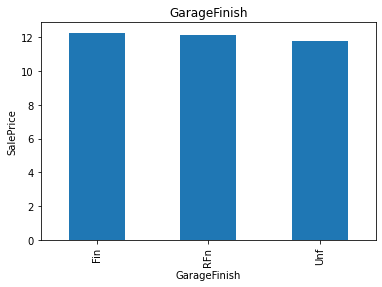

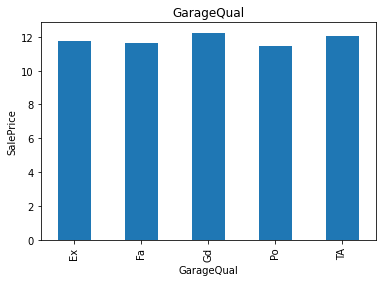

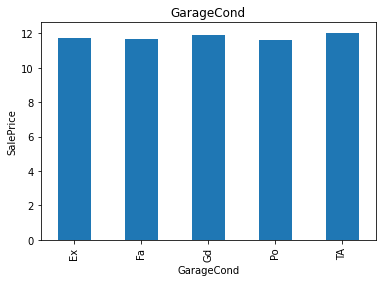

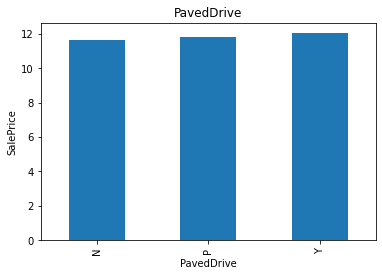

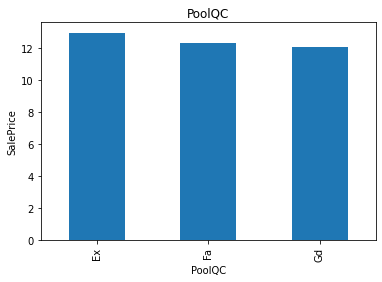

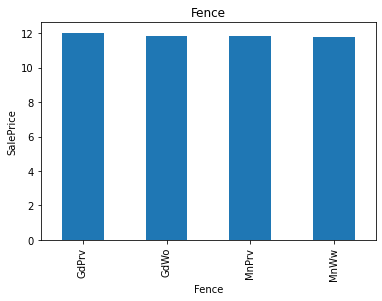

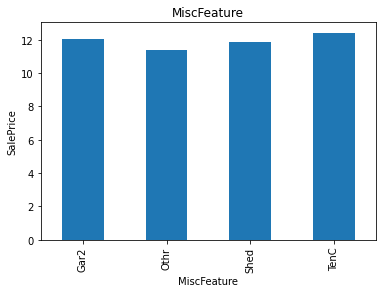

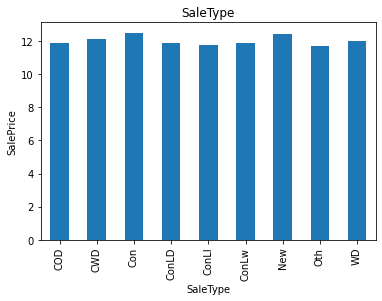

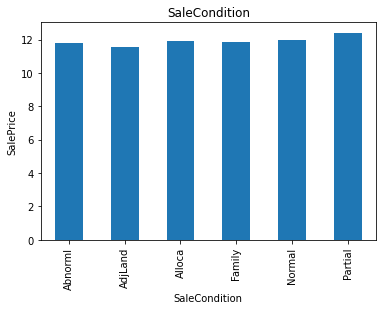

In [69]:
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Feature Engineering

# Missing Value

In [70]:
#Categorical Variables
#Replacing the null value with 'Missing'
df[categorical_features]=df[categorical_features].fillna('Missing')

df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [71]:
#Numerical Value

#Numerical Value with nan'
numerical_value_nan = [feature for feature in numerical_features if feature in null_features ]


for feature in numerical_value_nan:
    median_f=df[feature].median()
    
#Create a new feature to capture the non value
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    
#Replacing the null value with median   
    df[feature]= df[feature].fillna(median_f)

df[numerical_features].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Numerical Variables

From analysis beforehand, we can see that the continuous data is not distributed properly, so we have to perform log normal distribution

In [72]:
num_value = [feature for feature in numerical_features if 0 in df[feature]]

print(num_value)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [73]:
for feature in cont_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])


In [74]:
df[cont_features]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,4.174387,9.041922,5,5,196.0,706,0,150,856,6.752270,854,7.444249,5.0,548,0,61,0,0,12.247694
1,4.382027,9.169518,31,31,0.0,978,0,284,1262,7.140453,0,7.140453,31.0,460,298,0,0,0,12.109011
2,4.219508,9.328123,7,6,162.0,486,0,434,920,6.824374,866,7.487734,7.0,608,0,42,0,0,12.317167
3,4.094345,9.164296,91,36,0.0,216,0,540,756,6.867974,756,7.448334,8.0,642,0,35,272,0,11.849398
4,4.430817,9.565214,8,8,350.0,655,0,490,1145,7.043160,1053,7.695303,8.0,836,192,84,0,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,8.976768,8,7,0.0,0,0,953,953,6.859615,694,7.406711,8.0,460,0,40,0,0,12.072541
1456,4.442651,9.486076,32,22,119.0,790,163,589,1542,7.636752,0,7.636752,32.0,500,349,0,0,0,12.254863
1457,4.189655,9.109636,69,4,0.0,275,0,877,1152,7.080026,1152,7.757906,69.0,252,0,60,0,0,12.493130
1458,4.219508,9.181632,60,14,0.0,49,1029,0,1078,6.982863,0,6.982863,60.0,240,366,0,112,0,11.864462


# Handling Rare Categorical Feature

In [75]:
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [76]:
df.groupby('MSZoning')['SalePrice'].count()/len(df)

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64

In [77]:
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [78]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [79]:
#Convert the categorical value into numerical so it can be process in Machine Learning
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    le = LabelEncoder()   
    df[feature]= le.fit_transform(df[feature])

In [80]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,0,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486,6,0,434,920,0,0,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,2,4.127134,8.976768,0,1,3,3,0,3,0,7,2,0,0,2,6,5,8,7,0,0,8,8,2,0.0,3,3,2,2,4,4,6,0,6,0,953,953,0,0,1,3,6.859615,694,0,7.406711,0,0,2,1,3,1,3,7,4,1,5,0,8.0,2,2,460,3,3,2,0,40,0,0,0,0,0,2,0,0,8,2007,3,2,12.072541,0,0,0
1456,1457,20,2,4.442651,9.486076,0,1,3,3,0,3,0,12,2,0,0,1,6,6,32,22,0,0,5,5,4,119.0,3,3,1,2,4,4,0,790,5,163,589,1542,0,4,1,3,7.636752,0,0,7.636752,1,0,2,0,3,1,3,7,0,2,5,0,32.0,3,2,500,3,3,2,349,0,0,0,0,0,0,3,0,0,2,2010,3,2,12.254863,0,0,0
1457,1458,70,2,4.189655,9.109636,0,1,3,3,0,3,0,5,2,0,0,2,7,9,69,4,0,0,2,2,2,0.0,0,1,3,4,1,4,2,275,6,0,877,1152,0,0,1,3,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,4,2,2,0,69.0,2,1,252,3,3,2,0,60,0,0,0,0,0,0,2,2500,5,2010,3,2,12.493130,0,0,0
1458,1459,20,2,4.219508,9.181632,0,1,3,3,0,3,0,11,2,0,0,1,5,6,60,14,1,0,4,4,2,0.0,3,3,1,4,4,3,2,49,5,1029,0,1078,0,2,1,0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,4,0,3,0,60.0,3,1,240,3,3,2,366,0,112,0,0,0,0,2,0,0,4,2010,3,2,11.864462,0,0,0


# Feature Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
feature_scale = [feature for feature in df.columns if feature not in ['Id', 'SalePrice']]

print(feature_scale)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [83]:
scaler = MinMaxScaler()
scaler = scaler.fit(df[feature_scale])

In [84]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,0,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486,6,0,434,920,0,0,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,2,4.127134,8.976768,0,1,3,3,0,3,0,7,2,0,0,2,6,5,8,7,0,0,8,8,2,0.0,3,3,2,2,4,4,6,0,6,0,953,953,0,0,1,3,6.859615,694,0,7.406711,0,0,2,1,3,1,3,7,4,1,5,0,8.0,2,2,460,3,3,2,0,40,0,0,0,0,0,2,0,0,8,2007,3,2,12.072541,0,0,0
1456,1457,20,2,4.442651,9.486076,0,1,3,3,0,3,0,12,2,0,0,1,6,6,32,22,0,0,5,5,4,119.0,3,3,1,2,4,4,0,790,5,163,589,1542,0,4,1,3,7.636752,0,0,7.636752,1,0,2,0,3,1,3,7,0,2,5,0,32.0,3,2,500,3,3,2,349,0,0,0,0,0,0,3,0,0,2,2010,3,2,12.254863,0,0,0
1457,1458,70,2,4.189655,9.109636,0,1,3,3,0,3,0,5,2,0,0,2,7,9,69,4,0,0,2,2,2,0.0,0,1,3,4,1,4,2,275,6,0,877,1152,0,0,1,3,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,4,2,2,0,69.0,2,1,252,3,3,2,0,60,0,0,0,0,0,0,2,2500,5,2010,3,2,12.493130,0,0,0
1458,1459,20,2,4.219508,9.181632,0,1,3,3,0,3,0,11,2,0,0,1,5,6,60,14,1,0,4,4,2,0.0,3,3,1,4,4,3,2,49,5,1029,0,1078,0,2,1,0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,4,0,3,0,60.0,3,1,240,3,3,2,366,0,112,0,0,0,0,2,0,0,4,2010,3,2,11.864462,0,0,0


In [85]:
df = pd.concat([df[['Id','SalePrice']].reset_index(drop=True), 
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1 )

In [86]:
df

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.122500,0.333333,1.000000,0.50,0.5,1.00,1.00,0.333333,0.125089,1.000000,0.000000,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.000000,1.000000,1.000000,0.25,0.5,1.00,0.25,0.000000,0.173281,1.000000,0.000000,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.101250,0.333333,1.000000,0.50,0.5,1.00,0.75,0.333333,0.086109,1.000000,0.000000,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.000000,1.000000,1.000000,0.00,1.0,0.25,1.00,0.000000,0.038271,1.000000,0.000000,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.218750,0.333333,1.000000,0.50,0.5,1.00,0.00,0.333333,0.116052,1.000000,0.000000,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,1.000000,0.50,1.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,0.5,0.400718,0.353592,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.318182,0.4,0.0,0.0,0.4,0.555556,0.500,0.058824,0.131148,0.0,0.0,0.8,0.8,0.50,0.000000,1.

In [87]:
df.to_csv('trainfile.csv',index=False)